In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import linear_model

%matplotlib inline

In [2]:
my_data = pd.read_csv('/home/lin/教材/MearchineLearning/assignmentOneData/48EqualWeighted.csv')

In [3]:
my_data.head()

,Unnamed: 0,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1969-07-01,0.00,0.62,0.43,0.54,0.18,0.78,0.84,-0.01,0.58,...,1.19,0.66,0.66,0.38,1.22,0.25,0.50,0.99,0.61,1.79
1,1969-07-02,0.76,1.11,0.27,1.29,0.16,2.05,1.43,1.59,1.32,...,1.85,0.81,1.65,0.84,1.39,1.47,1.77,0.94,1.22,1.04
2,1969-07-03,0.31,1.23,0.50,2.02,1.59,1.40,0.83,0.79,1.03,...,1.73,0.87,1.14,0.79,1.57,2.14,0.46,2.13,1.25,3.06
3,1969-07-07,-0.04,-0.59,-0.41,0.11,-0.02,-0.43,-1.51,-0.04,-0.53,...,-0.82,-0.98,-0.60,-0.20,-1.34,-0.26,-1.07,-1.62,-0.61,-1.68
4,1969-07-08,0.46,-0.89,-0.79,-1.19,-1.09,-1.66,-1.68,-0.55,-1.46,...,-1.25,-1.25,-1.63,-1.22,-1.82,-1.15,-1.72,-2.13,-1.58,-2.83


In [4]:
my_data['Unnamed: 0'] = pd.to_datetime(my_data['Unnamed: 0'])

print( np.unique(my_data['Unnamed: 0']).shape, my_data['Unnamed: 0'].shape)

my_data.set_index('Unnamed: 0', inplace = True)

my_data.dtypes

(12196,) (12196,)


Agric    float64
Food     float64
Soda     float64
Beer     float64
Smoke    float64
Toys     float64
Fun      float64
Books    float64
Hshld    float64
Clths    float64
Hlth     float64
MedEq    float64
Drugs    float64
Chems    float64
Rubbr    float64
Txtls    float64
BldMt    float64
Cnstr    float64
Steel    float64
FabPr    float64
Mach     float64
ElcEq    float64
Autos    float64
Aero     float64
Ships    float64
Guns     float64
Gold     float64
Mines    float64
Coal     float64
Oil      float64
Util     float64
Telcm    float64
PerSv    float64
BusSv    float64
Comps    float64
Chips    float64
LabEq    float64
Paper    float64
Boxes    float64
Trans    float64
Whlsl    float64
Rtail    float64
Meals    float64
Banks    float64
Insur    float64
RlEst    float64
Fin      float64
Other    float64
dtype: object

In [5]:
my_data.isnull().any()

Agric    False
Food     False
Soda     False
Beer     False
Smoke    False
Toys     False
Fun      False
Books    False
Hshld    False
Clths    False
Hlth     False
MedEq    False
Drugs    False
Chems    False
Rubbr    False
Txtls    False
BldMt    False
Cnstr    False
Steel    False
FabPr    False
Mach     False
ElcEq    False
Autos    False
Aero     False
Ships    False
Guns     False
Gold     False
Mines    False
Coal     False
Oil      False
Util     False
Telcm    False
PerSv    False
BusSv    False
Comps    False
Chips    False
LabEq    False
Paper    False
Boxes    False
Trans    False
Whlsl    False
Rtail    False
Meals    False
Banks    False
Insur    False
RlEst    False
Fin      False
Other    False
dtype: bool

In [6]:
nAsset = my_data.shape[1]
trainningSet = my_data.iloc[: 250]
lambdaSeries = np.logspace(-12, -10, 800) #just for test
sigma = np.ones((nAsset, nAsset))

(10, 800)


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


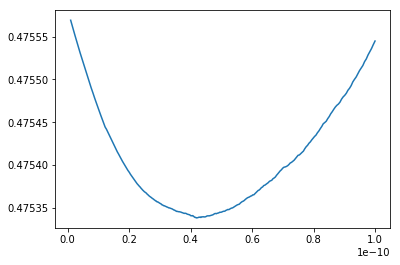

In [7]:
def cross_vali_for_lambda(trainning_set, lambdaSet, fold = 10, reg_type=linear_model.Lasso, seed=1):
    nObs = trainning_set.shape[0] 
    eachFold = nObs / fold
    shuffleSet = trainning_set.sample(frac = 1, random_state=seed).reset_index(drop = True)
    start_drop = 0
    stdSeries = np.ones([fold, lambdaSet.shape[0]]) * (-1)
    print(stdSeries.shape)
    
    balls = 0
    
    for i in range(1, 11):
        #print(i, "    ")
        sample = shuffleSet.drop(range(int(start_drop), int(start_drop + eachFold)))
        testSet = shuffleSet[int(start_drop):int(start_drop + eachFold)]
        start_drop += eachFold
        sigma = np.cov(sample.T)
        if sigma.shape != (nAsset, nAsset):
            print("Error from cost_fun: sigma has wrong dimention")
        j = 0
        
        for lambdaValue in lambdaSet:
            clf = reg_type(alpha=lambdaValue, fit_intercept=False)
            clf.fit(sigma, 0.000001 * np.ones(nAsset))
            if clf.coef_.sum() == 0:
                print("Error: cross_vali_for_lambda Sum of coef is zero, too sparse, try smaller lambda")
            weights = clf.coef_ / clf.coef_.sum()
            returns = testSet @ weights
            stdSeries[i-1, j] = returns.std()
            j += 1
            
    return stdSeries

stds = cross_vali_for_lambda(trainningSet, lambdaSeries, seed=60)
plt.plot(lambdaSeries, stds.mean(0))
plt.show()

(10, 800)


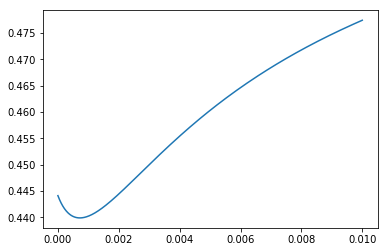

In [ ]:
import random

lambdaSeries = np.logspace(-7, -2, 800)
stds = cross_vali_for_lambda(trainningSet, lambdaSeries, reg_type=linear_model.Ridge, seed=1242787)
plt.plot(lambdaSeries, stds.mean(0))

In [ ]:
lambdaSeries = np.logspace(-7, -2, 800)
stds = cross_vali_for_lambda(trainningSet, lambdaSeries, reg_type=linear_model.Ridge, seed=3333333)
plt.plot(lambdaSeries, stds.mean(0))

(10, 800)
